In [1]:
!pip install torchinfo
import torch
import torch.optim as optim
from models import Net
from torchvision import transforms as T
from utils import Trainer, build_cifar, plot_misclassified, plot_sampledata

In [2]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(
            (0.49139968, 0.48215841, 0.44653091),
            (0.24703223, 0.24348513, 0.26158784),
        ),
    ]
)

# Test data transformations
test_transforms = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 170498071/170498071 [00:01<00:00, 93691517.04it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


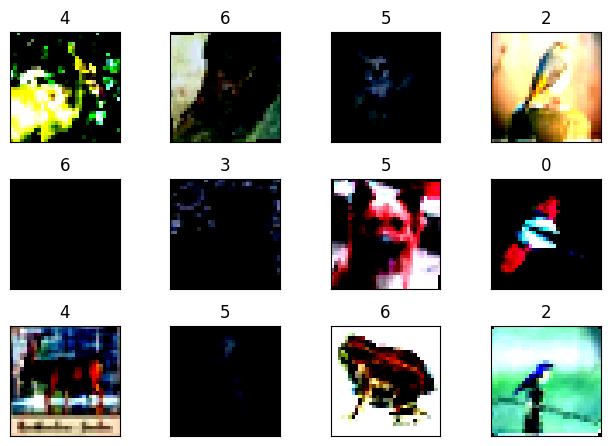

In [3]:
plot_sampledata(train_loader)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net(norm="gn").to(device)

In [5]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─GroupNorm: 2-3                    [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [6]:
num_epochs = 20
model = Net(drop=0.025, norm="gn").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.01, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.7196 Batch_id=781 Accuracy=26.11: 100%|██████████| 782/782 [00:52<00:00, 15.02it/s]


Test set: Average loss: 1.7547, Accuracy: 3582/10000 (35.82%)

Epoch 2


Train: Loss=1.6445 Batch_id=781 Accuracy=38.17: 100%|██████████| 782/782 [00:48<00:00, 16.02it/s]


Test set: Average loss: 1.5655, Accuracy: 4257/10000 (42.57%)

Epoch 3


Train: Loss=1.2177 Batch_id=781 Accuracy=45.07: 100%|██████████| 782/782 [00:48<00:00, 16.00it/s]


Test set: Average loss: 1.3660, Accuracy: 5056/10000 (50.56%)

Epoch 4


Train: Loss=1.4855 Batch_id=781 Accuracy=50.30: 100%|██████████| 782/782 [00:49<00:00, 15.85it/s]


Test set: Average loss: 1.2364, Accuracy: 5557/10000 (55.57%)

Epoch 5


Train: Loss=0.6625 Batch_id=781 Accuracy=54.42: 100%|██████████| 782/782 [00:49<00:00, 15.73it/s]


Test set: Average loss: 1.1996, Accuracy: 5659/10000 (56.59%)

Epoch 6


Train: Loss=1.4028 Batch_id=781 Accuracy=57.50: 100%|██████████| 782/782 [00:50<00:00, 15.59it/s]


Test set: Average loss: 1.0997, Accuracy: 6116/10000 (61.16%)

Epoch 7


Train: Loss=1.4810 Batch_id=781 Accuracy=59.81: 100%|██████████| 782/782 [00:49<00:00, 15.79it/s]


Test set: Average loss: 1.0350, Accuracy: 6409/10000 (64.09%)

Epoch 8


Train: Loss=1.3007 Batch_id=781 Accuracy=61.42: 100%|██████████| 782/782 [00:49<00:00, 15.73it/s]


Test set: Average loss: 1.0199, Accuracy: 6398/10000 (63.98%)

Epoch 9


Train: Loss=0.9386 Batch_id=781 Accuracy=63.24: 100%|██████████| 782/782 [00:49<00:00, 15.71it/s]


Test set: Average loss: 0.9418, Accuracy: 6706/10000 (67.06%)

Epoch 10


Train: Loss=1.4754 Batch_id=781 Accuracy=64.19: 100%|██████████| 782/782 [00:50<00:00, 15.63it/s]


Test set: Average loss: 0.8942, Accuracy: 6879/10000 (68.79%)

Epoch 11


Train: Loss=1.1975 Batch_id=781 Accuracy=65.11: 100%|██████████| 782/782 [00:49<00:00, 15.91it/s]


Test set: Average loss: 0.9286, Accuracy: 6722/10000 (67.22%)

Epoch 12


Train: Loss=1.1921 Batch_id=781 Accuracy=65.94: 100%|██████████| 782/782 [00:49<00:00, 15.69it/s]


Test set: Average loss: 0.8810, Accuracy: 6949/10000 (69.49%)

Epoch 13


Train: Loss=0.8288 Batch_id=781 Accuracy=67.00: 100%|██████████| 782/782 [00:49<00:00, 15.73it/s]


Test set: Average loss: 0.8872, Accuracy: 6890/10000 (68.90%)

Epoch 14


Train: Loss=0.9568 Batch_id=781 Accuracy=67.68: 100%|██████████| 782/782 [00:49<00:00, 15.70it/s]


Test set: Average loss: 0.8328, Accuracy: 7098/10000 (70.98%)

Epoch 15


Train: Loss=1.2727 Batch_id=781 Accuracy=68.62: 100%|██████████| 782/782 [00:49<00:00, 15.68it/s]


Test set: Average loss: 0.8437, Accuracy: 7048/10000 (70.48%)

Epoch 16


Train: Loss=0.8914 Batch_id=781 Accuracy=69.11: 100%|██████████| 782/782 [00:50<00:00, 15.54it/s]


Test set: Average loss: 0.7982, Accuracy: 7229/10000 (72.29%)

Epoch 17


Train: Loss=0.7005 Batch_id=781 Accuracy=69.72: 100%|██████████| 782/782 [00:49<00:00, 15.65it/s]


Test set: Average loss: 0.7694, Accuracy: 7370/10000 (73.70%)

Epoch 18


Train: Loss=0.6430 Batch_id=781 Accuracy=70.53: 100%|██████████| 782/782 [00:49<00:00, 15.66it/s]


Test set: Average loss: 0.7642, Accuracy: 7328/10000 (73.28%)

Epoch 19


Train: Loss=0.8998 Batch_id=781 Accuracy=70.91: 100%|██████████| 782/782 [00:49<00:00, 15.77it/s]


Test set: Average loss: 0.7513, Accuracy: 7399/10000 (73.99%)

Epoch 20


Train: Loss=1.3953 Batch_id=781 Accuracy=71.17: 100%|██████████| 782/782 [00:49<00:00, 15.82it/s]


Test set: Average loss: 0.7500, Accuracy: 7409/10000 (74.09%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 71.17@20		71.17
test	 74.09@20		74.09


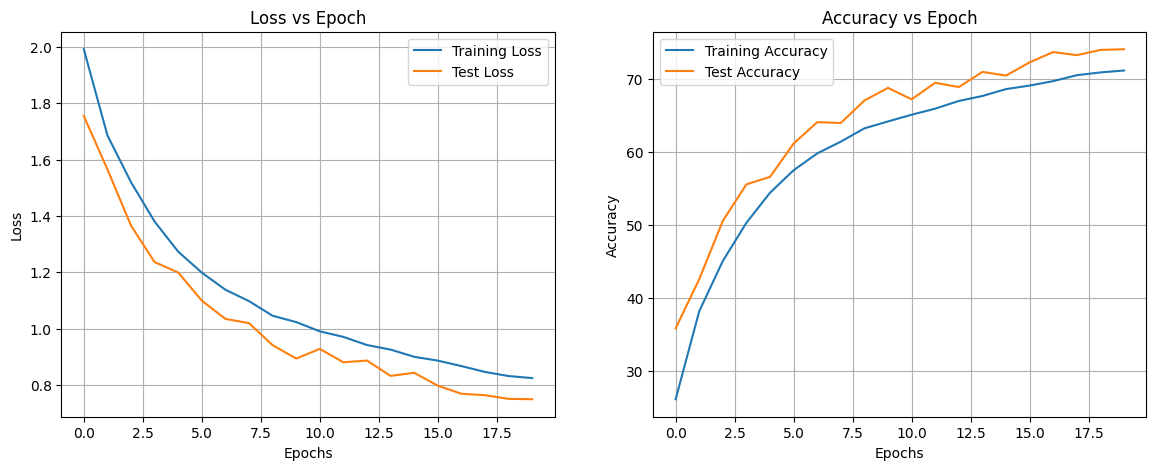

In [7]:
trainer.plot_history()

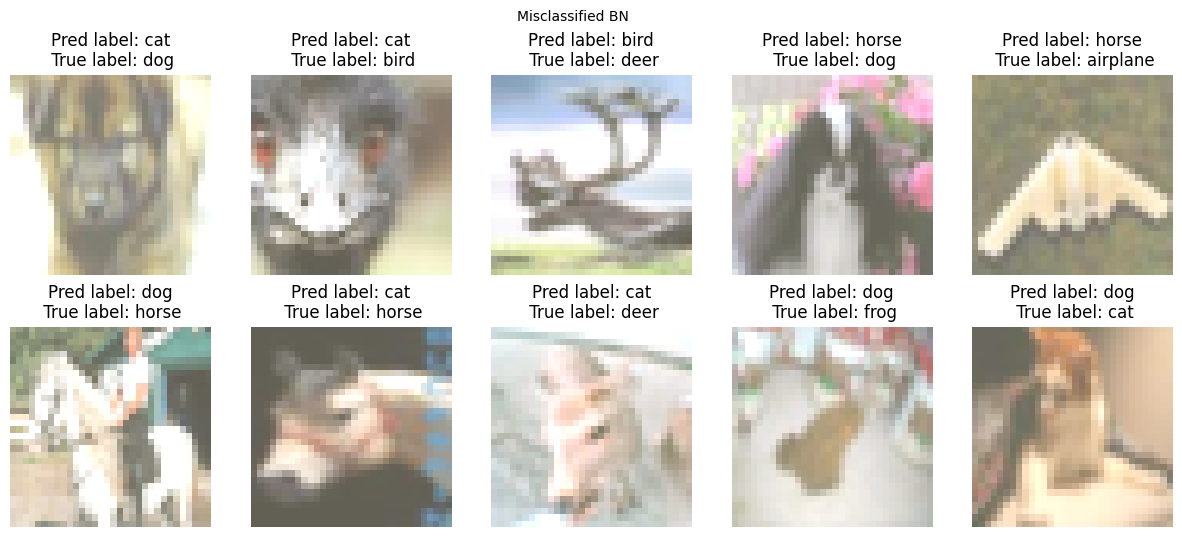

In [8]:
plot_misclassified(
    model,
    test_loader,
    device,
    (0.49139968, 0.48215841, 0.44653091),
    (0.24703223, 0.24348513, 0.26158784),
)